In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

myDF = pd.read_csv("census income data/adult.data", 
                   header = None, 
                   names = columns, 
                   skipinitialspace = True)

print(f"Shape: {myDF.shape}")
print(f"columns: {myDF.columns.tolist()}")
print("\nFirst 5 rows:")
print(myDF.head())


Shape: (32561, 15)
columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

First 5 rows:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-c

In [4]:
print("Income distribution:")
print(myDF['income'].value_counts())
print("\n")
print(f"Percentage making >50K: {(myDF['income'] == '>50K').mean():.2%}\n\n")

print("Columns with '?' (missing) values:")
for col in myDF.columns:
    missing_count = (myDF[col] == '?').sum()
    if missing_count > 0:
        print(f"  {col}: {missing_count} missing values ({missing_count/len(myDF)*100:.1f}%)")


print("Numerical columns:")
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
print(myDF[numerical_cols].describe())

Income distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


Percentage making >50K: 24.08%


Columns with '?' (missing) values:
  workclass: 1836 missing values (5.6%)
  occupation: 1843 missing values (5.7%)
  native-country: 583 missing values (1.8%)
Numerical columns:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000

In [5]:
cleanDF = myDF.replace('?', 'Unknown')

In [6]:
#print("Sample of current data:")
#print(cleanDF[['sex', 'workclass', 'income']].head())

In [7]:
encoded_data = cleanDF.copy()
text_columns = ['sex', 'workclass', 'income', 'education', 
                'marital-status', 'occupation', 'relationship',
                'race', 'native-country']

for col in text_columns:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(cleanDF[col])

#print("Sample of fully encoded data:")
#print(encoded_data.head())

In [8]:
x = encoded_data.drop('income', axis=1)
y = encoded_data['income']

print(f"Features shape: {x.shape}")
print(f"Target shape: {y.shape}")

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"Training set: {x_train.shape[0]} samples")
print(f"Testing set: {x_test.shape[0]} samples")

tree_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

print("\nTraining the decision tree...")
tree_model.fit(x_train, y_train)
print("Training complete")

Features shape: (32561, 14)
Target shape: (32561,)
Training set: 26048 samples
Testing set: 6513 samples

Training the decision tree...
Training complete


In [9]:
y_pred = tree_model.predict(x_test)
y_pred_prob = tree_model.predict_proba(x_test)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual values:", y_test[:10].values)
print("\n")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

First 10 predictions: [0 0 1 0 0 1 1 0 0 0]
First 10 actual values: [0 0 1 0 0 1 1 0 0 1]


Accuracy: 0.8549 (85.49%)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4942
           1       0.79      0.54      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.83      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



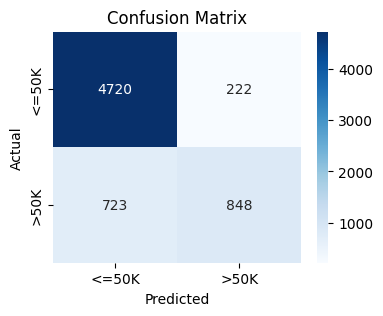

Confusion Matrix:
[[4720  222]
 [ 723  848]]


In [10]:
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualizing it
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion Matrix:")
print(cm)

Top 10 Most Important Features:
           feature  importance
7     relationship    0.458890
10    capital-gain    0.232494
4    education-num    0.221072
11    capital-loss    0.054457
12  hours-per-week    0.022230
6       occupation    0.005329
0              age    0.004546
2           fnlwgt    0.000613
1        workclass    0.000370
3        education    0.000000




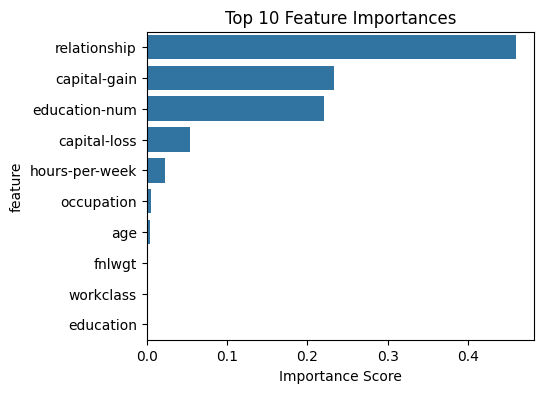

In [11]:
# getting feature importance
feature_importance = tree_model.feature_importances_
feature_names = x_train.columns

# creating DataFrame for feature importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(importance_df.head(10))
print("\n")

# visualizing feature importance
plt.figure(figsize=(5, 4))
sns.barplot(data=importance_df.head(10), y='feature', x='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()